In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Downloads/Train_sample.csv')

In [3]:
#Check if the data has loaded successfully
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100041,0,Cash loans,F,N,N,0,112500.0,450000.0,44509.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
2,100044,0,Cash loans,M,N,Y,0,121500.0,454500.0,15151.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3,100045,0,Cash loans,F,N,Y,0,99000.0,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


# I. Data Cleaning and Exploration

There are quite a few misplace data between some 2 columns that are next to each other as I observed on the csv file, so i will check these comlumns out and have them swapped

In [4]:
#"WEEKDAY_APPR_PROCESS_START" -- "HOUR_APPR_PROCESS_START"
df["WEEKDAY_APPR_PROCESS_START"].value_counts().sort_index()

1              32
2             279
3              47
FRIDAY       1580
MONDAY       1631
SATURDAY     1080
SUNDAY        481
THURSDAY     1584
TUESDAY      1671
WEDNESDAY    1615
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [5]:
m = df.WEEKDAY_APPR_PROCESS_START.isin(['0','1','2','3'])
df.loc[m,['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']] = df.loc[m,['HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START']].values

In [6]:
df["WEEKDAY_APPR_PROCESS_START"].value_counts().sort_index()

FRIDAY       1642
MONDAY       1691
SATURDAY     1132
SUNDAY        506
THURSDAY     1632
TUESDAY      1728
WEDNESDAY    1669
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [7]:
#"ORGANIZATION_TYPE" -- "EXT_SOURCE_1"
df["ORGANIZATION_TYPE"].value_counts().sort_index()

0                          277
1                           81
Advertising                 11
Agriculture                 66
Bank                        85
Business Entity Type 1     171
Business Entity Type 2     308
Business Entity Type 3    2146
Cleaning                     7
Construction               197
Culture                     15
Electricity                 24
Emergency                   24
Government                 318
Hotel                       41
Housing                    105
Industry: type 1            35
Industry: type 10            8
Industry: type 11           90
Industry: type 12           17
Industry: type 13            4
Industry: type 2            16
Industry: type 3           120
Industry: type 4            20
Industry: type 5            12
Industry: type 6             3
Industry: type 7            45
Industry: type 8             1
Industry: type 9           100
Insurance                   19
Kindergarten               234
Legal Services               9
Medicine

In [8]:
m = df.ORGANIZATION_TYPE.isin(['0','1'])
df.loc[m,['ORGANIZATION_TYPE','EXT_SOURCE_1']] = df.loc[m,['EXT_SOURCE_1','ORGANIZATION_TYPE']].values

In [9]:
df["ORGANIZATION_TYPE"].value_counts().sort_index()

Advertising                 12
Agriculture                 67
Bank                        87
Business Entity Type 1     174
Business Entity Type 2     316
Business Entity Type 3    2216
Cleaning                     7
Construction               210
Culture                     15
Electricity                 24
Emergency                   25
Government                 336
Hotel                       43
Housing                    114
Industry: type 1            36
Industry: type 10            8
Industry: type 11           96
Industry: type 12           17
Industry: type 13            4
Industry: type 2            17
Industry: type 3           125
Industry: type 4            20
Industry: type 5            14
Industry: type 6             3
Industry: type 7            48
Industry: type 8             1
Industry: type 9           104
Insurance                   20
Kindergarten               245
Legal Services               9
Medicine                   379
Military                    85
Mobile  

In [10]:
#"OCCUPATION_TYPE" -- "CNT_FAM_MEMBERS"
df["OCCUPATION_TYPE"].value_counts().sort_index()

0                         333
1                          25
Accountants               320
Cleaning staff            151
Cooking staff             193
Core staff                898
Drivers                   571
HR staff                   18
High skill tech staff     363
IT staff                   13
Laborers                 1673
Low-skill Laborers         89
Managers                  656
Medicine staff            296
Private service staff      94
Realty agents              22
Sales staff              1036
Secretaries                46
Security staff            187
Waiters/barmen staff       37
Name: OCCUPATION_TYPE, dtype: int64

In [11]:
m = df.OCCUPATION_TYPE.isin(['0','1'])
df.loc[m,['OCCUPATION_TYPE','CNT_FAM_MEMBERS']] = df.loc[m,['CNT_FAM_MEMBERS','OCCUPATION_TYPE']].values

In [12]:
df["OCCUPATION_TYPE"].value_counts().sort_index()

Accountants               328
Cleaning staff            151
Cooking staff             203
Core staff                927
Drivers                   606
HR staff                   19
High skill tech staff     375
IT staff                   14
Laborers                 1756
Low-skill Laborers         92
Managers                  672
Medicine staff            305
Private service staff      97
Realty agents              24
Sales staff              1068
Secretaries                47
Security staff            199
Waiters/barmen staff       38
Name: OCCUPATION_TYPE, dtype: int64

In the 'FONDKAPREMONT_MODE' column, almost half of its value is NaN (4565/10000). Thus, the data comes in a very inconsistent way where category value is just accounting for 2/3 (3042/4565) of the non-NaN value, and there is no nearest columns with suitable data to do data swapping, so I decided to drop this column out. 

In [13]:
df["FONDKAPREMONT_MODE"].value_counts().sort_index()

0.0                        58
0.0007                      1
0.0009                      1
0.001                       1
0.0011                      3
0.0012                      1
0.0015                      1
0.0018                      1
0.0023                      5
0.0024                      1
0.0027                      1
0.0029                      1
0.0035                      1
0.0036                      1
0.0039                      1
0.0042                      1
0.0043                      1
0.0049                      1
0.0062                      1
0.0066                      1
0.0068                      1
0.0077                      2
0.0081                      1
0.0092                      1
0.0099                      1
0.0105                      1
0.0116                      1
0.012                       1
0.0132                      1
0.0133                      1
                         ... 
0.0455                      1
0.0469                      1
0.0472    

In [14]:
df['FONDKAPREMONT_MODE'].count()

3187

In [15]:
df.drop(columns = ['FONDKAPREMONT_MODE'], inplace = True)

For 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', besides NaN cells which is similar to the case above, there is a format error with values appears like "Stone or brik", so I will have the residual apostrophe removed.

In [16]:
df['WALLSMATERIAL_MODE'] = df['WALLSMATERIAL_MODE'].str.replace(r"[\"\', ]", '')
df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].str.replace(r"[\"\', ]", '')
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].str.replace(r"[\"\', ]", '')
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].str.replace(r"[\"\', ]", '')

In [17]:
#"WALLSMATERIAL_MODE" -- "TOTALAREA_MODE"
df["TOTALAREA_MODE"].value_counts().sort_index()

0.0                  13
0.0001                1
0.0006                1
0.0007                2
0.0008                2
0.001                 2
0.0011                2
0.0012                3
0.0013                3
0.0014                5
0.0015                7
0.0016                5
0.0017                4
0.0018                5
0.0019                3
0.002                 4
0.0021                6
0.0022                1
0.0023                9
0.0024                9
0.0025                8
0.0026                2
0.0027                5
0.0028                4
0.0029                3
0.003                 2
0.0031                2
0.0032                2
0.0033                3
0.0034                2
                   ... 
0.6093                1
0.6142                1
0.6182                1
0.6196                1
0.6216                1
0.622                 1
0.6271                1
0.6272                1
0.6287                1
0.6307                1
0.631           

In [18]:
#swap misplace data between TOTALAREA_MODE and WALLSMATERIAL_MODE
m = df.TOTALAREA_MODE.isin(['block of flats','specific housing'])
df.loc[m,['WALLSMATERIAL_MODE','TOTALAREA_MODE']] = df.loc[m,['TOTALAREA_MODE','WALLSMATERIAL_MODE']].values

In [19]:
df["TOTALAREA_MODE"].value_counts().sort_index()

0.0       13
0.0001     1
0.0006     1
0.0007     2
0.0008     2
0.001      2
0.0011     2
0.0012     3
0.0013     3
0.0014     5
0.0015     7
0.0016     5
0.0017     4
0.0018     5
0.0019     3
0.002      4
0.0021     6
0.0022     1
0.0023     9
0.0024     9
0.0025     8
0.0026     2
0.0027     5
0.0028     4
0.0029     3
0.003      3
0.0031     2
0.0032     2
0.0033     3
0.0034     2
          ..
0.5984     1
0.6048     1
0.6093     1
0.6142     1
0.6182     1
0.6196     1
0.6216     1
0.622      1
0.6271     1
0.6272     1
0.6287     1
0.6307     1
0.631      1
0.6546     1
0.6596     1
0.6619     1
0.6783     1
0.6791     1
0.6861     1
0.701      1
0.7059     1
0.7334     1
0.7343     1
0.7502     1
0.7628     1
0.7935     1
0.8381     1
0.8943     1
0.9468     1
1.0        2
Name: TOTALAREA_MODE, Length: 2113, dtype: int64

Values in 'OBS_30_CNT_SOCIAL_CIRCLE' column is really inconsistent as I observed in the csv file. This maybe caused by incorrection in data entry. Besides, we have 2 columns for 60 days of observation which is already include the two 30 days of observation columns, thus will have high correlation and create a bad effect towards the model, so I will drop the two 30-ones and keep the 60-ones.

In [20]:
df.drop(columns = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'], inplace = True)

I have also seen that there are a couple of NaN values in AMT-columns and these just accuounting for a small minority. These column values has exclude one another, so I will keep them all and replace these NaN values by '0'

In [21]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()/df.shape[0]*100

10.52

In [22]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()/df.shape[0]*100

13.56

In [23]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()/df.shape[0]*100

13.639999999999999

In [24]:
df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()/df.shape[0]*100

13.639999999999999

In [25]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()/df.shape[0]*100

13.639999999999999

In [26]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()/df.shape[0]*100

13.639999999999999

In [27]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)

For variables have no effect on predict one's default credit loan like loan ID, who was accompanying with the clinet, at what hour did the client applied, I will drop them out

In [28]:
df.drop(columns = ['SK_ID_CURR','NAME_TYPE_SUITE','HOUR_APPR_PROCESS_START'], inplace = True)

In [29]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9.992000e+03,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.078700,0.414700,1.678845e+05,6.021343e+05,27127.039500,5.415649e+05,-15465.465940,60238.886400,-2952.31930,-3046.617400,...,0.005600,0.002200,0.000600,0.000400,0.004400,0.007900,0.02310,0.182600,0.235900,1.298100
std,0.269283,0.715664,9.490227e+04,4.041451e+05,14443.148728,3.713931e+05,5206.049419,138913.099633,27109.52684,1657.722911,...,0.074627,0.046855,0.024489,0.019997,0.069146,0.114188,0.16604,0.754397,0.687094,1.734225
min,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,-25160.000000,-25059.000000,-20981.00000,-16222.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16452.000000,2.385000e+05,-19488.000000,-3058.250000,-7358.00000,-4317.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.440000e+05,5.147775e+05,25033.500000,4.500000e+05,-15553.500000,-1327.500000,-4347.50000,-3254.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,-12003.750000,-320.000000,-1849.00000,-1700.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
max,1.000000,7.000000,1.935000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,365243.000000,365243.00000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.00000,16.000000,14.000000,13.000000


In [30]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,COMMONAREA_AVG,6967,30.33
1,COMMONAREA_MEDI,6967,30.33
2,COMMONAREA_MODE,6967,30.33
3,NONLIVINGAPARTMENTS_MEDI,6887,31.13
4,NONLIVINGAPARTMENTS_AVG,6887,31.13
5,NONLIVINGAPARTMENTS_MODE,6887,31.13
6,LIVINGAPARTMENTS_MEDI,6812,31.88
7,LIVINGAPARTMENTS_AVG,6812,31.88
8,LIVINGAPARTMENTS_MODE,6812,31.88
9,FLOORSMIN_MEDI,6736,32.64


I see that the missing value in the dataset of information of clients about the place they live is huge, like half of the dataset. This may be optional to declare at the first place, and many people ignore it, so we have that much missing value. Even if we try to predict or impute, it won't give a good result. Logically, a credit loan status does not seem to have much relationship with one's place of living condition, so i decide to drop these column out.
For EXT_SOURCE columns, I don't really know what are they stand for. As missing values in EXT_SOURCE_1 achieve 50% data, I will drop this too. For EXT_SOURCE_2 and EXT_SOURCE_3, I will replace the missing values by their median values.
OWN_CAR_AGE is also a thing. Missing value achieve 60%, I can assume that this dataset is collected in a place where not so many people use car, or still at a young age, or both. Because of so, this variable won't contribute much to the prediction, so I will drop it also.

In [31]:
drop = ['EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
df.drop(columns = drop, inplace=True)

I noticed that for 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', there are abnormal values. In 'DAYS_BIRTH', we have many <1 days values and a value of 365243 in 'DAYS_EMPLOYED', 'DAYS_REGISTRATION'. I assume that these are mistake in data entry step. There are 2 ways to handle this: we drop them out and predict, or apply Linear regression to predict an appropriate for these abnormal values
Below are the code use to predict and replace NaN values instead of just drop them out. My idea is that we will deploy it in 2 ways, then compare which would have a better result

In [32]:
df.drop(df[df.DAYS_BIRTH > 0].index, inplace=True)
df.drop(df[df.DAYS_EMPLOYED == 365243].index, inplace=True)
df.drop(df[df.DAYS_REGISTRATION > 365243].index, inplace=True)

Data in 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' come in negative, as I am not really sure if these needed to be converted into positive values, I will just keep them as they are. 
Since I don't know at what year this report was done, so i will make an approximately calculation in converting these 4 variables into year scale for better observation by devide their value by 365.

In [33]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH']/365
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED']/365
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION']/365
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH']/365

In [34]:
df.shape

(7925, 69)

Format 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3' into the same scale as did with above DAYS-variables

In [35]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE']/365
df['FLAG_DOCUMENT_2'] = df['FLAG_DOCUMENT_2']/365
df['FLAG_DOCUMENT_2'] = df['FLAG_DOCUMENT_2']/365

Fill NaN value for columns that has not so many NaN values by their mean, or the most popular value 'Laborers' in categorical OCCUPATION_TYPE columns, or '0' for column that NaN is assumed for no observation

In [36]:
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_3'].mean())
df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())
df.drop(columns = ['OWN_CAR_AGE'], inplace=True)
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Laborers')
df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df['DAYS_LAST_PHONE_CHANGE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)

Final check if all the NaN value has been handling

In [37]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,TARGET,0,100.0
1,ORGANIZATION_TYPE,0,100.0
2,EXT_SOURCE_2,0,100.0
3,EXT_SOURCE_3,0,100.0
4,OBS_60_CNT_SOCIAL_CIRCLE,0,100.0
5,DEF_60_CNT_SOCIAL_CIRCLE,0,100.0
6,DAYS_LAST_PHONE_CHANGE,0,100.0
7,FLAG_DOCUMENT_2,0,100.0
8,FLAG_DOCUMENT_3,0,100.0
9,FLAG_DOCUMENT_4,0,100.0


Text(0.5,1,'Count the target variable')

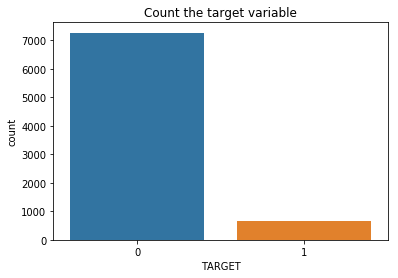

In [38]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='TARGET', data=df)
plt.title("Count the target variable")

As we can see, the good status is overwhelm the bad status and may cause incorrect in prediction where accuracy score may score very high but has no meaning on evaluation

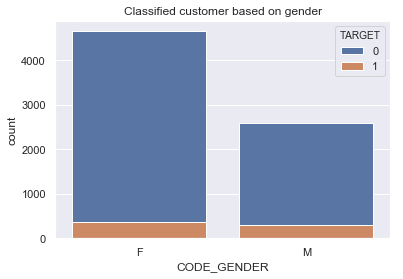

In [39]:
sns.set()
ax = sns.countplot(x='CODE_GENDER',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on gender')
plt.show()

The proparbility of the 2 gender in becoming a Bad customer is approximately equal. Female has higher demand in credit loan than male

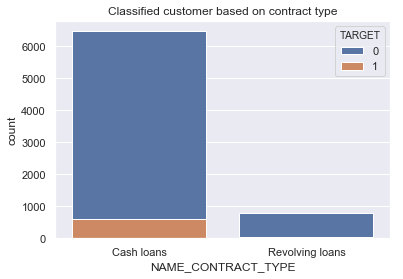

In [40]:
sns.set()
ax = sns.countplot(x='NAME_CONTRACT_TYPE',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on contract type')
plt.show()

Reliable variable. If a customer issue a revolving loans, it would be more likely they would pay on time, thus identified as a Good customer

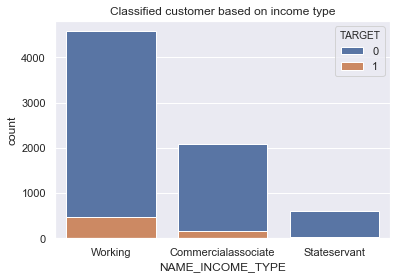

In [41]:
sns.set()
ax = sns.countplot(x='NAME_INCOME_TYPE',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on income type')
plt.show()

Reliable variable. If a customer is a stateservant, it would be more likely they would pay on time, thus identified as a Good customer

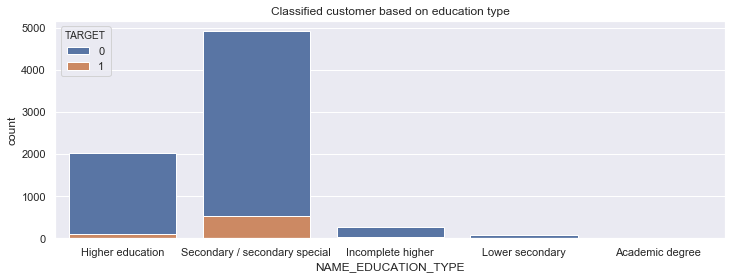

In [42]:
sns.set()
plt.figure(figsize=(12,4))
ax = sns.countplot(x='NAME_EDUCATION_TYPE',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on education type')
plt.show()

People who has low education level seems to have low pay job accompanied, thus lead to a weak finacial status and easier to get evoled in a credit loans product.

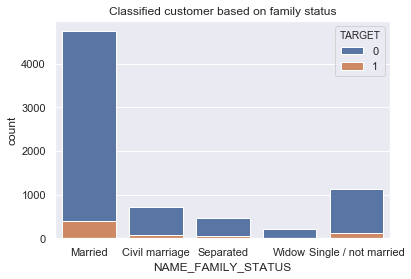

In [43]:
sns.set()
ax = sns.countplot(x='NAME_FAMILY_STATUS',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on family status')
plt.show()

People who married would encounter many finacial related issues, thus more likely to get envolved in a credit loan.

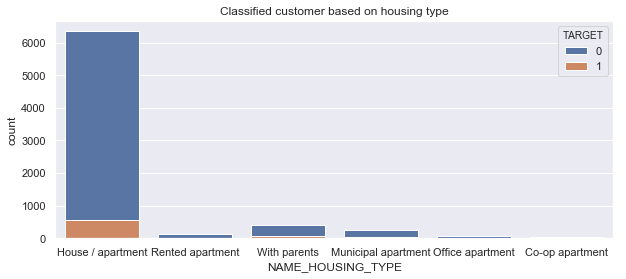

In [44]:
sns.set()
plt.figure(figsize=(10,4))
ax = sns.countplot(x='NAME_HOUSING_TYPE',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on housing type')
plt.show()

People who live in a house/ aparment are usually young people that has just moved out, or a small family. These people would encounter many finacial related issues, thus more likely to get envolved in a credit loan.

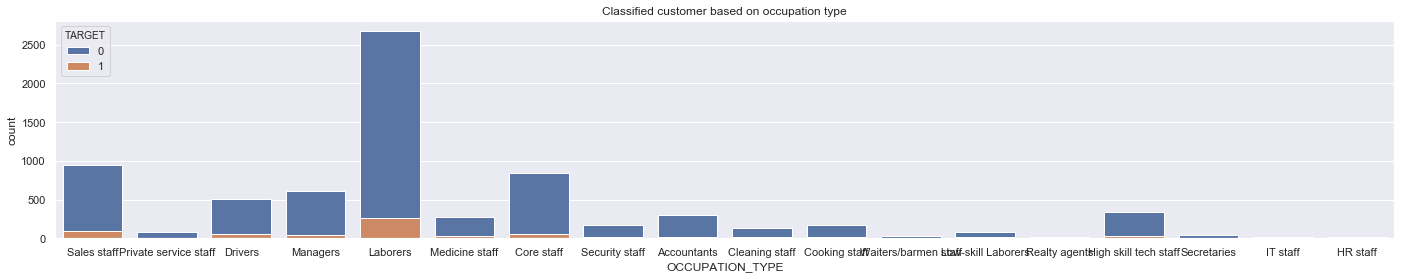

In [45]:
sns.set()
plt.figure(figsize=(24,4))
ax = sns.countplot(x='OCCUPATION_TYPE',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on occupation type')
plt.show()

Not much conclusion in this case. Many NaN value has been replaced by 'Laborers' and usually when people don't want to be specific about their job, they will just declare it as 'Laborers'. Also, the probability of a person to pay their loan on time based on their job has a not really high confidence.

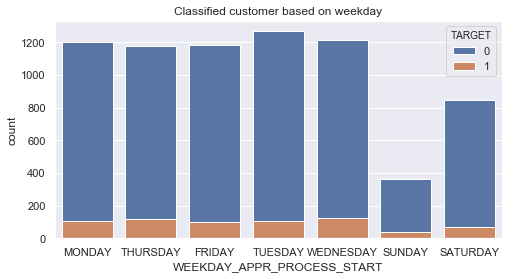

In [46]:
sns.set()
plt.figure(figsize=(8,4))
ax = sns.countplot(x='WEEKDAY_APPR_PROCESS_START',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on weekday')
plt.show()

A low number of an approve on Saturday and Sunday is just because of regular working time basis. Other days in week don't are approxiamtely equal. I don't feel that this variable will create much impact, so I will drop it out

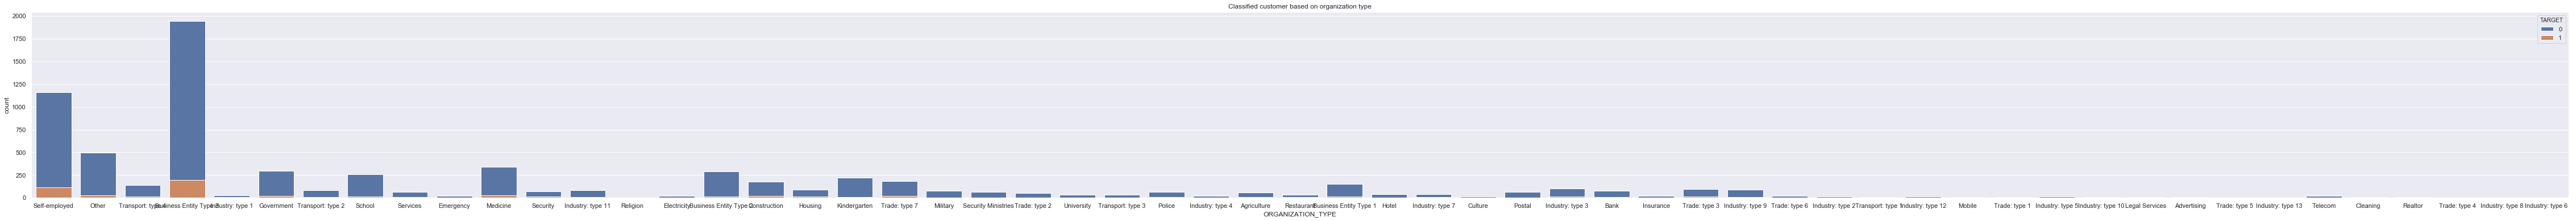

In [47]:
sns.set()
plt.figure(figsize=(80,6))
ax = sns.countplot(x='ORGANIZATION_TYPE',data=df,hue='TARGET',dodge=False)
ax.set_title('Classified customer based on organization type')
plt.show()

People who are self-employed and Business Entity Type 2 are more likely to get involed in a credit loan. This maybe because they have higher income thus lead to a higher demand in buying, or their income is too low that they can not pay right away but using a credit loan product.

In [48]:
df.drop(columns = ['OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START'], inplace = True)

Check out correlation between numeric variable to decide which should be kept

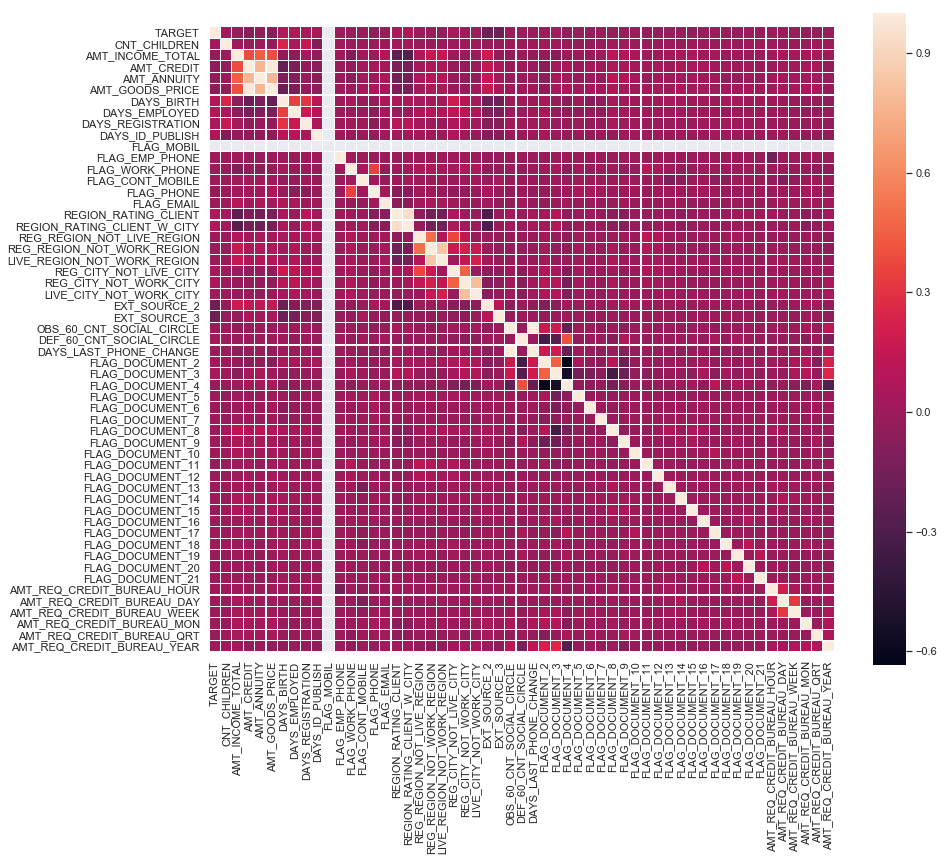

In [49]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths=0.1,vmax=1.0, square=True,  linecolor='white')
plt.show()

See that 'FLAG_MOBIL' is fill with value '1' and has no effect towards the prediction, I will drop it.
'AMT_CREDIT' has high correlation with 'AMT_GOOD_PRICE' is easy to understand, because the biger the price of the good, the biger the credit amount of loan.
'DAYS_LAST_PHONE_CHANGE' also has high correlation with 'OBS_60_CNT_SOCIAL_CIRCLE'. But as the heatmap in overall does not have many correlated pairs compare to the number of variables, I will keep these values.

In [50]:
df['FLAG_MOBIL'].value_counts()

1.0    7925
Name: FLAG_MOBIL, dtype: int64

In [51]:
df.drop(columns = ['FLAG_MOBIL'], inplace = True)

Apply LabelEncoder for categorical variables

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
df['CODE_GENDER'] = le.fit_transform(df['CODE_GENDER'])
df['NAME_CONTRACT_TYPE'] = le.fit_transform(df['NAME_CONTRACT_TYPE'])
df['ORGANIZATION_TYPE'] = le.fit_transform(df['ORGANIZATION_TYPE'])
df['FLAG_OWN_CAR'] = le.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = le.fit_transform(df['FLAG_OWN_REALTY'])

# II. Data Analysing

In [53]:
df.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE               int64
CODE_GENDER                      int64
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                 int64
NAME_EDUCATION_TYPE              int64
NAME_FAMILY_STATUS               int64
NAME_HOUSING_TYPE                int64
REGION_POPULATION_RELATIVE      object
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                 object
REGION_RATING_CLIENT     

Convert object data type to int for model calculation

In [54]:
df['REGION_POPULATION_RELATIVE'] = df['REGION_POPULATION_RELATIVE'].astype(str).astype(float)
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(str).astype(float)

### Preparing data for modelling

There is 2 way to handle this kind of data. Since the '0' values of TERGET is overwhelm '1' values, I will apply over sampling method to balance the number of records of this binary value. In the same time, I still condcut analysing on the original data to compare is there any differences between the 2 methods.

In [55]:
df['TARGET'].value_counts()

0    7262
1     663
Name: TARGET, dtype: int64

In [58]:
from sklearn.utils import resample
up_sampling = df[df.TARGET == 0]
up_sampling = up_sampling.append(resample(df[df.TARGET == 1], n_samples = 7263, random_state = 0))
up_sampling.TARGET.value_counts()

1    7263
0    7262
Name: TARGET, dtype: int64

In [61]:
#Create input x and y from upsampled data
x = up_sampling.loc[:, up_sampling.columns != 'TARGET']
y = up_sampling.TARGET
#Create input x_full and y_full from original data
x_full = df.loc[:, df.columns != 'TARGET']
y_full = df.TARGET
print(x_full.shape, y_full.shape, x.shape, y.shape)

(7925, 64) (7925,) (14525, 64) (14525,)


In [64]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
X1_train, X1_test, y1_train, y1_test = train_test_split(x_full, y_full, test_size=0.2, random_state=100)

### Apply Logistic Regression

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

C:\Users\Huynh Hung\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Huynh Hung\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Logistic Regression on up sampling data

Create a pipeline which combine StandardScaler() method and LogisticRegression to reduce typing time

In [63]:
pipe_lr0 = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(random_state=100))])

In [66]:
prLR0 = pipe_lr0.fit(X_train, y_train)

In [67]:
y_prLR0=prLR0.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_LR = classification_report(y_test, y_prLR0)
print(NoTuning_LR)

             precision    recall  f1-score   support

          0       0.69      0.72      0.71      1415
          1       0.72      0.69      0.71      1490

avg / total       0.71      0.71      0.71      2905



Tuning using GridSearchCV

In [68]:
parametersLR0 = dict(clf__C=[0.1,0.3,0.5,0.8,1])
GSCV_LR0 = GridSearchCV(pipe_lr0,param_grid=parametersLR0,refit = True, verbose=2)
GSCV_FIT_LR0 = GSCV_LR0.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] clf__C=0.1 ......................................................
[CV] ............................................. clf__C=0.1 -   0.1s
[CV] clf__C=0.1 ......................................................
[CV] ............................................. clf__C=0.1 -   0.1s
[CV] clf__C=0.1 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................................. clf__C=0.1 -   0.1s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   0.1s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   0.2s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   0.2s
[CV] clf__C=0.5 ......................................................
[CV] ............................................. clf__C=0.5 -   0.2s
[CV] clf__C=0.5 ......................................................
[CV] ............................................. clf__C=0.5 -   0.2s
[CV] clf__C=0.5 ......................................................
[CV] ............................................. clf__C=0.5 -   0.2s
[CV] clf__C=0.8 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.8s finished


In [71]:
KQ_GSCV_LR0 = GSCV_FIT_LR0.best_estimator_

In [70]:
Fit_LR0 = KQ_GSCV_LR0.fit(X_train, y_train)
y_prLR_0 = Fit_LR0.predict(X_test)
Tuning_LR = classification_report(y_test, y_prLR_0)
print(Tuning_LR)

             precision    recall  f1-score   support

          0       0.69      0.72      0.71      1415
          1       0.72      0.69      0.71      1490

avg / total       0.71      0.71      0.71      2905



Logistic Regression on original data

In [74]:
prLR_Full = pipe_lr0.fit(X1_train, y1_train)

In [75]:
y_prLR_Full = prLR_Full.predict(X1_test)
FullData_LR = classification_report(y1_test, y_prLR_Full)
print(FullData_LR)

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1453
          1       0.33      0.01      0.01       132

avg / total       0.87      0.92      0.88      1585



Tuning

In [76]:
parametersLR0 = dict(clf__C=[0.1,0.3,0.5,0.8,1])
GSCV_LR_Full = GridSearchCV(pipe_lr0,param_grid=parametersLR0,refit = True, verbose=2)
GSCV_FIT_LR_Full = GSCV_LR_Full.fit(X1_train, y1_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] clf__C=0.1 ......................................................
[CV] ............................................. clf__C=0.1 -   0.1s
[CV] clf__C=0.1 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................................. clf__C=0.1 -   0.0s
[CV] clf__C=0.1 ......................................................
[CV] ............................................. clf__C=0.1 -   0.0s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   0.0s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   0.0s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   0.0s
[CV] clf__C=0.5 ......................................................
[CV] ............................................. clf__C=0.5 -   0.0s
[CV] clf__C=0.5 ......................................................
[CV] ............................................. clf__C=0.5 -   0.0s
[CV] clf__C=0.5 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.6s finished


In [77]:
KQ_GSCV_LR_Full = GSCV_FIT_LR_Full.best_estimator_

In [79]:
Fit_LR_Full = KQ_GSCV_LR_Full.fit(X1_train, y1_train)
y_prLR_Full = Fit_LR_Full.predict(X1_test)
Tuning_LR_Full = classification_report(y1_test, y_prLR_Full)
print(Tuning_LR_Full)

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1453
          1       0.50      0.01      0.01       132

avg / total       0.88      0.92      0.88      1585



Logistic Regression with PCA

In [80]:
pipe_lr1 = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=100))])
prLR1 = pipe_lr1.fit(X_train, y_train)

In [81]:
y_prLR1=prLR1.predict(X_test)
NoTuning_LR_PCA = classification_report(y_test, y_prLR1)
print(NoTuning_LR_PCA)

             precision    recall  f1-score   support

          0       0.60      0.57      0.59      1415
          1       0.61      0.64      0.62      1490

avg / total       0.61      0.61      0.61      2905



Tuning

In [82]:
parametersLR1 = dict(pca__n_components=[1,5,7,10],clf__C=[0.1,0.3,0.5,0.8,1])
GSCV_LR1 = GridSearchCV(pipe_lr1,param_grid=parametersLR1,refit = True, verbose=2)
GSCV_FIT_LR1 = GSCV_LR1.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   0.0s
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   0.0s
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   0.0s
[CV] clf__C=0.1, pca__n_components=5 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........................ clf__C=0.1, pca__n_components=5 -   0.0s
[CV] clf__C=0.1, pca__n_components=5 .................................
[CV] ........................ clf__C=0.1, pca__n_components=5 -   0.0s
[CV] clf__C=0.1, pca__n_components=5 .................................
[CV] ........................ clf__C=0.1, pca__n_components=5 -   0.0s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   0.1s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   0.0s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   0.0s
[CV] clf__C=0.1, pca__n_components=10 ................................
[CV] ....................... clf__C=0.1, pca__n_components=10 -   0.0s
[CV] clf__C=0.1, pca__n_components=10 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.0s finished


In [84]:
KQ_GSCV_LR1 = GSCV_FIT_LR1.best_estimator_

In [85]:
Fit_LR1 = KQ_GSCV_LR1.fit(X_train, y_train)
y_prLR_1 = Fit_LR1.predict(X_test)
Tuning_LR_PCA = classification_report(y_test, y_prLR_1)
print(Tuning_LR_PCA)

             precision    recall  f1-score   support

          0       0.62      0.65      0.63      1415
          1       0.65      0.63      0.64      1490

avg / total       0.64      0.64      0.64      2905



Conduct on original data

In [86]:
prLR1_Full = pipe_lr1.fit(X1_train, y1_train)

In [87]:
y_prLR1_Full=prLR1.predict(X1_test)
NoTuning_LR_PCA_Full = classification_report(y1_test, y_prLR1_Full)
print(NoTuning_LR_PCA_Full)

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1453
          1       0.00      0.00      0.00       132

avg / total       0.84      0.92      0.88      1585



C:\Users\Huynh Hung\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
parametersLR1 = dict(pca__n_components=[1,5,7,10],clf__C=[0.1,0.3,0.5,0.8,1])
GSCV_LR1_Full = GridSearchCV(pipe_lr1,param_grid=parametersLR1,refit = True, verbose=2)
GSCV_FIT_LR1_Full = GSCV_LR1_Full.fit(X1_train, y1_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   0.2s
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   0.0s
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   0.0s
[CV] clf__C=0.1, pca__n_components=5 .................................
[CV] ........................ clf__C=0.1, pca__n_components=5 -   0.0s
[CV] clf__C=0.1, pca__n_components=5 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........................ clf__C=0.1, pca__n_components=5 -   0.0s
[CV] clf__C=0.1, pca__n_components=5 .................................
[CV] ........................ clf__C=0.1, pca__n_components=5 -   0.0s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   0.1s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   0.0s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   0.0s
[CV] clf__C=0.1, pca__n_components=10 ................................
[CV] ....................... clf__C=0.1, pca__n_components=10 -   0.0s
[CV] clf__C=0.1, pca__n_components=10 ................................
[CV] ....................... clf__C=0.1, pca__n_components=10 -   0.0s
[CV] clf__C=0.1, pca__n_components=10 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.2s finished


In [89]:
KQ_GSCV_LR1_Full = GSCV_FIT_LR1_Full.best_estimator_

In [90]:
Fit_LR1_Full = KQ_GSCV_LR1_Full.fit(X1_train, y1_train)
y_prLR_1_Full = Fit_LR1_Full.predict(X1_test)
Tuning_LR_PCA_Full = classification_report(y1_test, y_prLR_1_Full)
print(Tuning_LR_PCA_Full)

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1453
          1       0.00      0.00      0.00       132

avg / total       0.84      0.92      0.88      1585



C:\Users\Huynh Hung\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## III. Conclusion

As can be seen from the above analysis, original data with imbalanced probability TARGET values return bad prediction result. F1-score of '0' achieves really high when '1' is 0.
After apply over sampling, precision of prediction model has improve by a lot, achieve a number of almost 0.7 for each value before apply PCA. This is still not a really good score, but not really bad also. Improvement can be made by adjust input variable. Maybe in this model, data about one's living place is an important factor for prediction, but was dropped out due to a great number of NaN values. Additional data collection can be made to help increase dataset's covariance.
In another hand, we can try to predict DAYS_BIRTH, DAYS_EMPLOYED and DAYS_REGISTER instead of just drop them out as it was done in this model.
Some other binary classification can be used to have a wider observation like Random Forrest, Support Vector Machine, ... along with other dimensional reduction method elsewhere than PCA like SelectKBest, Ridge and Lasso,...  